<a href="https://colab.research.google.com/github/sattwiksuman/autonomous_driving/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

from keras.models import Model

In [ ]:
np.random.seed(0) #to recreate results

In [ ]:
#Import the data
(X_train, y_train), (X_test, y_test)= mnist.load_data()

In [ ]:
#Check the shape
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
#Test whether the data loaded is correct
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


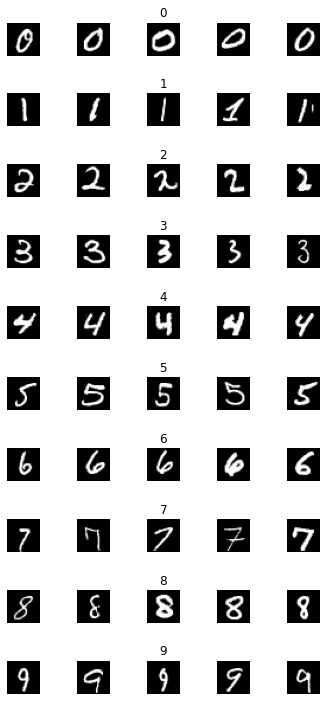

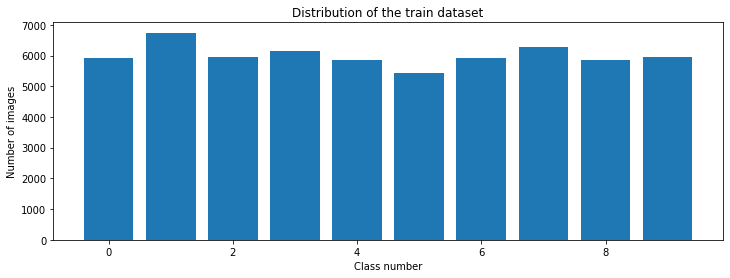

In [ ]:
#Plot the data

num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()


In [ ]:
#Reshape the X values: the images must have a n*l*b*c dimension where n=no. of frames, l*b px = dim of each image and c=1 = no. of channels
X_train = X_train.reshape(60000, 28, 28, 1)         #6000 frames of 28x28px dimension and 1 channel
X_test = X_test.reshape(10000, 28, 28, 1)

In [ ]:
#Convert y values to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
#Normalise the X values for being processed by the NN
X_train = X_train/255
X_test = X_test/255

In [ ]:
# define the larger model
def leNet_model():
  # create model
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(28, 28, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Compile model
  model.compile(Adam(lr = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
#Create a Model Object
model = leNet_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 375)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               188000    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0

Epoch 1/10
135/135 [==============================] - 32s 230ms/step - loss: 0.4898 - accuracy: 0.8360 - val_loss: 0.0595 - val_accuracy: 0.9817
Epoch 2/10
135/135 [==============================] - 31s 226ms/step - loss: 0.0743 - accuracy: 0.9772 - val_loss: 0.0453 - val_accuracy: 0.9863
Epoch 3/10
135/135 [==============================] - 31s 226ms/step - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0475 - val_accuracy: 0.9860
Epoch 4/10
135/135 [==============================] - 30s 225ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0418 - val_accuracy: 0.9873
Epoch 5/10
135/135 [==============================] - 30s 225ms/step - loss: 0.0383 - accuracy: 0.9882 - val_loss: 0.0460 - val_accuracy: 0.9863
Epoch 6/10
135/135 [==============================] - 30s 225ms/step - loss: 0.0398 - accuracy: 0.9877 - val_loss: 0.0420 - val_accuracy: 0.9883
Epoch 7/10
135/135 [==============================] - 30s 225ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0455 - val_ac

Text(0.5, 0, 'epoch')

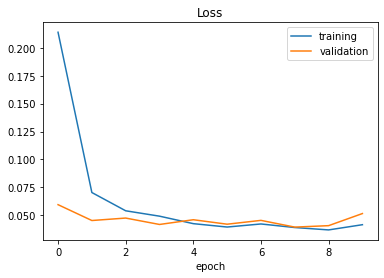

In [ ]:
history=model.fit(X_train, y_train, epochs=10,  validation_split = 0.1, batch_size = 400, verbose = 1, shuffle = 1)

Text(0.5, 0, 'epoch')

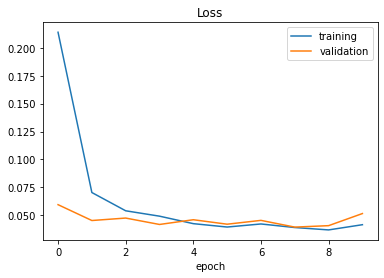

In [ ]:
#Plot to see the variation of training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

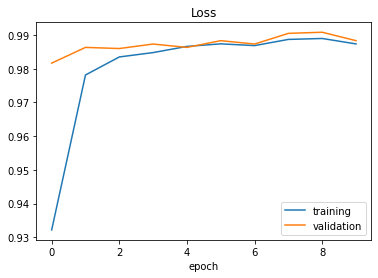

In [ ]:
#Plotting the variation of accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

In [ ]:
#Rvaluate the model over test set
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.02982139028608799
Test accuracy: 0.9907000064849854


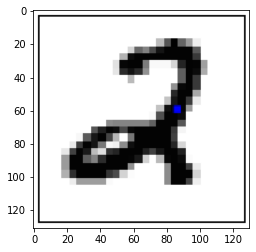

In [ ]:
#Import Image to test on the model prediction
import requests
from PIL import Image   #from python imaging library import image

url='https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response=requests.get(url, stream=True)     #response stores the raw component as an object now
img = Image.open(response.raw)      #opens the raw content as an image
plt.imshow(img)         

(1, 28, 28, 1)


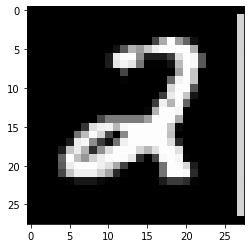

In [ ]:
#Processing the image to feed into the model
import cv2
img_array=np.asarray(img)       #convert image into a numpy array sothat we can resize
resized = cv2.resize(img_array, (28, 28))       #resize the image to be similar to what the model was trained on. however this gives shape (28, 28, 4)
gray_scale=cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)        #this will convert the array into a 2D array of shape (28, 28). We will subsequently convert it into (1,28,28,1)
#now image has white background. but model was trained with black background
image = cv2.bitwise_not(gray_scale)     #effectively inverts the colous
plt.imshow(image, cmap=plt.get_cmap("gray"))    #convert to grayscale
image = image / 255     #normalize the image to feed into the neural net
image = image.reshape(1,28,28,1)        #reshape image sothat it matched the image size the model is trained on
print(image.shape)

In [ ]:
#Print and verify the prediction
print("predicted digit: "+str(model.predict_classes(image)))

predicted digit: [2]


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
